In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from feature_engine.encoding import RareLabelEncoder
from feature_engine.encoding import CountFrequencyEncoder
from feature_engine.outliers import Winsorizer
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.transformation import LogCpTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.linear_model import ElasticNet
from sklearn.linear_model import HuberRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

In [2]:
tb_data = pd.read_csv('../data/train.csv', index_col='id')
tb_data

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,A,B,D,A,E,C,I,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
2,B,A,A,A,B,B,A,E,A,F,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
3,A,A,A,C,B,D,A,B,C,N,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
4,A,A,A,C,B,D,A,E,G,K,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
6,A,B,A,A,B,B,A,E,C,F,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499993,A,B,A,C,B,B,A,E,E,L,...,0.269578,0.258655,0.363598,0.300619,0.340516,0.235711,0.383477,0.215227,0.793630,8.343538
499996,A,B,A,C,B,B,A,E,E,L,...,0.197211,0.257024,0.574304,0.227035,0.322583,0.286094,0.324874,0.306933,0.230902,7.851861
499997,A,B,A,C,B,B,A,E,C,M,...,0.449482,0.386172,0.476217,0.135947,0.502730,0.235788,0.316671,0.250286,0.349041,7.600558


In [3]:
range_scale = MinMaxScaler()
X = tb_data.loc[:, :'cont13']
Y = tb_data['target']

In [4]:
cat_columns = X.select_dtypes(include=object).columns.to_list()
cont_columns = X.select_dtypes(include=np.number).columns.to_list()
X[cont_columns] = range_scale.fit_transform(X[cont_columns])
X

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
id,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,A,B,D,A,E,C,I,...,0.114564,0.855691,0.359931,0.643496,0.882829,0.811322,0.685241,0.654854,0.913387,0.785206
2,B,A,A,A,B,B,A,E,A,F,...,0.115723,0.465907,0.288058,0.084307,0.583471,0.526128,0.570654,0.695283,0.343629,0.908989
3,A,A,A,C,B,D,A,B,C,N,...,0.129890,0.884880,0.310331,0.753604,0.852951,0.836672,0.210755,0.648330,0.904611,0.936786
4,A,A,A,C,B,D,A,E,G,K,...,0.721352,0.902538,0.509813,0.239914,0.855406,0.802359,0.448007,0.650962,0.843251,0.638256
6,A,B,A,A,B,B,A,E,C,F,...,0.111686,0.415176,0.630849,0.140716,0.432551,0.432796,0.685273,0.635506,0.360980,0.195151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499993,A,B,A,C,B,B,A,E,E,L,...,0.719690,0.315305,0.204602,0.187108,0.293608,0.297509,0.181488,0.327877,0.228370,0.888255
499996,A,B,A,C,B,B,A,E,E,L,...,0.729014,0.251359,0.203048,0.441633,0.220760,0.277562,0.233423,0.267703,0.323208,0.101727
499997,A,B,A,C,B,B,A,E,C,M,...,0.134425,0.474276,0.326122,0.323148,0.130585,0.477937,0.181568,0.259280,0.264627,0.266850


In [5]:
base_line = Pipeline(steps=[('rare', RareLabelEncoder(n_categories=3,
                                                      variables=cat_columns)),
                            ('frequancy', CountFrequencyEncoder(encoding_method='frequency',
                                                                variables=cat_columns)),
                            ('winsorizer', Winsorizer(capping_method='iqr', tail='both',
                                                      variables=cont_columns)),
                            ('logit', LogCpTransformer(C=0.001, variables=['cont3', 'cont4', 'cont5', 'cont7',
                                                                           'cont11', 'cont12', 'cont13'])),
                            ('yeo_johnson', YeoJohnsonTransformer(variables=['cont0', 'cont1', 'cont2', 'cont6',
                                                                             'cont8', 'cont9', 'cont10'
                                                                             ])),
                            ('feature_selection', SelectKBest(score_func=mutual_info_regression, k=12))
                            ])
base_line.get_params()

{'memory': None,
 'steps': [('rare', RareLabelEncoder(n_categories=3,
                    variables=['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5',
                               'cat6', 'cat7', 'cat8', 'cat9'])),
  ('frequancy',
   CountFrequencyEncoder(encoding_method='frequency',
                         variables=['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5',
                                    'cat6', 'cat7', 'cat8', 'cat9'])),
  ('winsorizer',
   Winsorizer(capping_method='iqr', tail='both',
              variables=['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5',
                         'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11',
                         'cont12', 'cont13'])),
  ('logit',
   LogCpTransformer(C=0.001,
                    variables=['cont3', 'cont4', 'cont5', 'cont7', 'cont11',
                               'cont12', 'cont13'])),
  ('yeo_johnson',
   YeoJohnsonTransformer(variables=['cont0', 'cont1', 'cont2', 'cont6', 'cont8',
               

In [6]:
X_ = base_line.fit_transform(X, Y)
trainX, val_x, trainY, val_y = train_test_split(X_, Y, test_size=0.3)
train_x, test_x, train_y, test_y = train_test_split(trainX, trainY, test_size=0.35)

C:\Users\hewar\AppData\Local\Programs\Python\Python39\lib\site-packages\feature_engine\encoding\rare_label.py:179: UserWarning: The number of unique categories for variable cat0 is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
C:\Users\hewar\AppData\Local\Programs\Python\Python39\lib\site-packages\feature_engine\encoding\rare_label.py:179: UserWarning: The number of unique categories for variable cat1 is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
C:\Users\hewar\AppData\Local\Programs\Python\Python39\lib\site-packages\feature_engine\encoding\rare_label.py:179: UserWarning: The number of unique categories for variable cat2 is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(


In [7]:
print(f'trainX:{trainX.shape} | trainY:{trainY.shape}\n'
      f'val_x:{val_x.shape} | val_y:{val_y.shape}\n'
      f'train_x:{train_x.shape} | train_y:{train_y.shape}\n'
      f'test_x:{test_x.shape} | test_y:{test_y.shape}'
      )

trainX:(210000, 12) | trainY:(210000,)
val_x:(90000, 12) | val_y:(90000,)
train_x:(136500, 12) | train_y:(136500,)
test_x:(73500, 12) | test_y:(73500,)


In [8]:
cv = RepeatedKFold(n_splits=6, n_repeats=12)

- linear models

***Elastic Net***

In [8]:
elastic_net = Pipeline(steps=[('poly', PolynomialFeatures()),
                              ('elasticNet', ElasticNet())])
elastic_net.get_params()

{'memory': None,
 'steps': [('poly', PolynomialFeatures()), ('elasticNet', ElasticNet())],
 'verbose': False,
 'poly': PolynomialFeatures(),
 'elasticNet': ElasticNet(),
 'poly__degree': 2,
 'poly__include_bias': True,
 'poly__interaction_only': False,
 'poly__order': 'C',
 'elasticNet__alpha': 1.0,
 'elasticNet__copy_X': True,
 'elasticNet__fit_intercept': True,
 'elasticNet__l1_ratio': 0.5,
 'elasticNet__max_iter': 1000,
 'elasticNet__normalize': 'deprecated',
 'elasticNet__positive': False,
 'elasticNet__precompute': False,
 'elasticNet__random_state': None,
 'elasticNet__selection': 'cyclic',
 'elasticNet__tol': 0.0001,
 'elasticNet__warm_start': False}

In [19]:
max_iter = 10

rgs = RandomizedSearchCV(estimator=elastic_net,
                         param_distributions={'poly__degree': [1, 2, 3],
                                              'elasticNet__alpha': [0.001, 0.01, 0.1, 0.5, 1, 10],
                                              'elasticNet__l1_ratio': [0, 0.25, 0.5, 0.75, 1],
                                              'elasticNet__max_iter': [1000, 2000, 4000]
                                              },
                         n_iter=max_iter,
                         cv=cv,
                         return_train_score=True,
                         scoring={'r2': make_scorer(r2_score),
                                  'mse': make_scorer(mean_squared_error, greater_is_better=False)
                                  },
                         refit='r2',
                         n_jobs=-1)
rgs.get_params()

{'cv': RepeatedKFold(n_repeats=12, n_splits=6, random_state=None),
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('poly', PolynomialFeatures()),
  ('elasticNet', ElasticNet())],
 'estimator__verbose': False,
 'estimator__poly': PolynomialFeatures(),
 'estimator__elasticNet': ElasticNet(),
 'estimator__poly__degree': 2,
 'estimator__poly__include_bias': True,
 'estimator__poly__interaction_only': False,
 'estimator__poly__order': 'C',
 'estimator__elasticNet__alpha': 1.0,
 'estimator__elasticNet__copy_X': True,
 'estimator__elasticNet__fit_intercept': True,
 'estimator__elasticNet__l1_ratio': 0.5,
 'estimator__elasticNet__max_iter': 1000,
 'estimator__elasticNet__normalize': 'deprecated',
 'estimator__elasticNet__positive': False,
 'estimator__elasticNet__precompute': False,
 'estimator__elasticNet__random_state': None,
 'estimator__elasticNet__selection': 'cyclic',
 'estimator__elasticNet__tol': 0.0001,
 'estimator__elasticNet__warm_start': False,
 'estimator':

In [20]:
rgs.fit(train_x, train_y)

C:\Users\hewar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.197e+04, tolerance: 1.079e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


RandomizedSearchCV(cv=RepeatedKFold(n_repeats=12, n_splits=6, random_state=None),
                   estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                             ('elasticNet', ElasticNet())]),
                   n_jobs=-1,
                   param_distributions={'elasticNet__alpha': [0.001, 0.01, 0.1,
                                                              0.5, 1, 10],
                                        'elasticNet__l1_ratio': [0, 0.25, 0.5,
                                                                 0.75, 1],
                                        'elasticNet__max_iter': [1000, 2000,
                                                                 4000],
                                        'poly__degree': [1, 2, 3]},
                   refit='r2', return_train_score=True,
                   scoring={'mse': make_scorer(mean_squared_error, greater_is_better=False),
                            'r2': make_scorer(r2_score)})

In [32]:
rgs.best_estimator_, rgs.best_score_, rgs.best_params_

(Pipeline(steps=[('poly', PolynomialFeatures()),
                 ('elasticNet',
                  ElasticNet(alpha=0.001, l1_ratio=0, max_iter=4000))]),
 0.03682377724419195,
 {'poly__degree': 2,
  'elasticNet__max_iter': 4000,
  'elasticNet__l1_ratio': 0,
  'elasticNet__alpha': 0.001})

In [18]:
en_rgs = Pipeline(steps=[('poly', PolynomialFeatures()),
                         ('elasticNet', ElasticNet(alpha=0.001, l1_ratio=0, max_iter=4000))])
en_rgs.fit(train_x, train_y)

C:\Users\hewar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.173e+04, tolerance: 1.075e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('poly', PolynomialFeatures()),
                ('elasticNet',
                 ElasticNet(alpha=0.001, l1_ratio=0, max_iter=4000))])

In [22]:
rgs.cv_results_

{'mean_fit_time': array([2.24007010e-01, 2.55568471e-01, 7.95037884e+02, 5.59544075e+00,
        2.22581449e-01, 5.36012770e+00, 2.81741256e+01, 1.89286817e+02,
        1.31302502e+00, 2.22123841e-01]),
 'std_fit_time': array([4.84995274e-02, 3.66927031e-02, 5.41547759e+01, 7.29349199e-01,
        1.56600466e-02, 1.66427481e-01, 7.74501400e-01, 6.82062480e+00,
        1.86622637e-01, 1.55824156e-02]),
 'mean_score_time': array([0.01836711, 0.02000955, 0.15806253, 0.34563302, 0.01808469,
        0.30912202, 0.0303222 , 0.14654676, 0.11125262, 0.01770267]),
 'std_score_time': array([0.00629112, 0.00581264, 0.02523201, 0.04867067, 0.00351216,
        0.02446136, 0.00340413, 0.01409367, 0.02073259, 0.00361555]),
 'param_poly__degree': masked_array(data=[1, 1, 2, 3, 1, 3, 1, 2, 2, 1],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_elasticNet__max_iter': masked_array(da

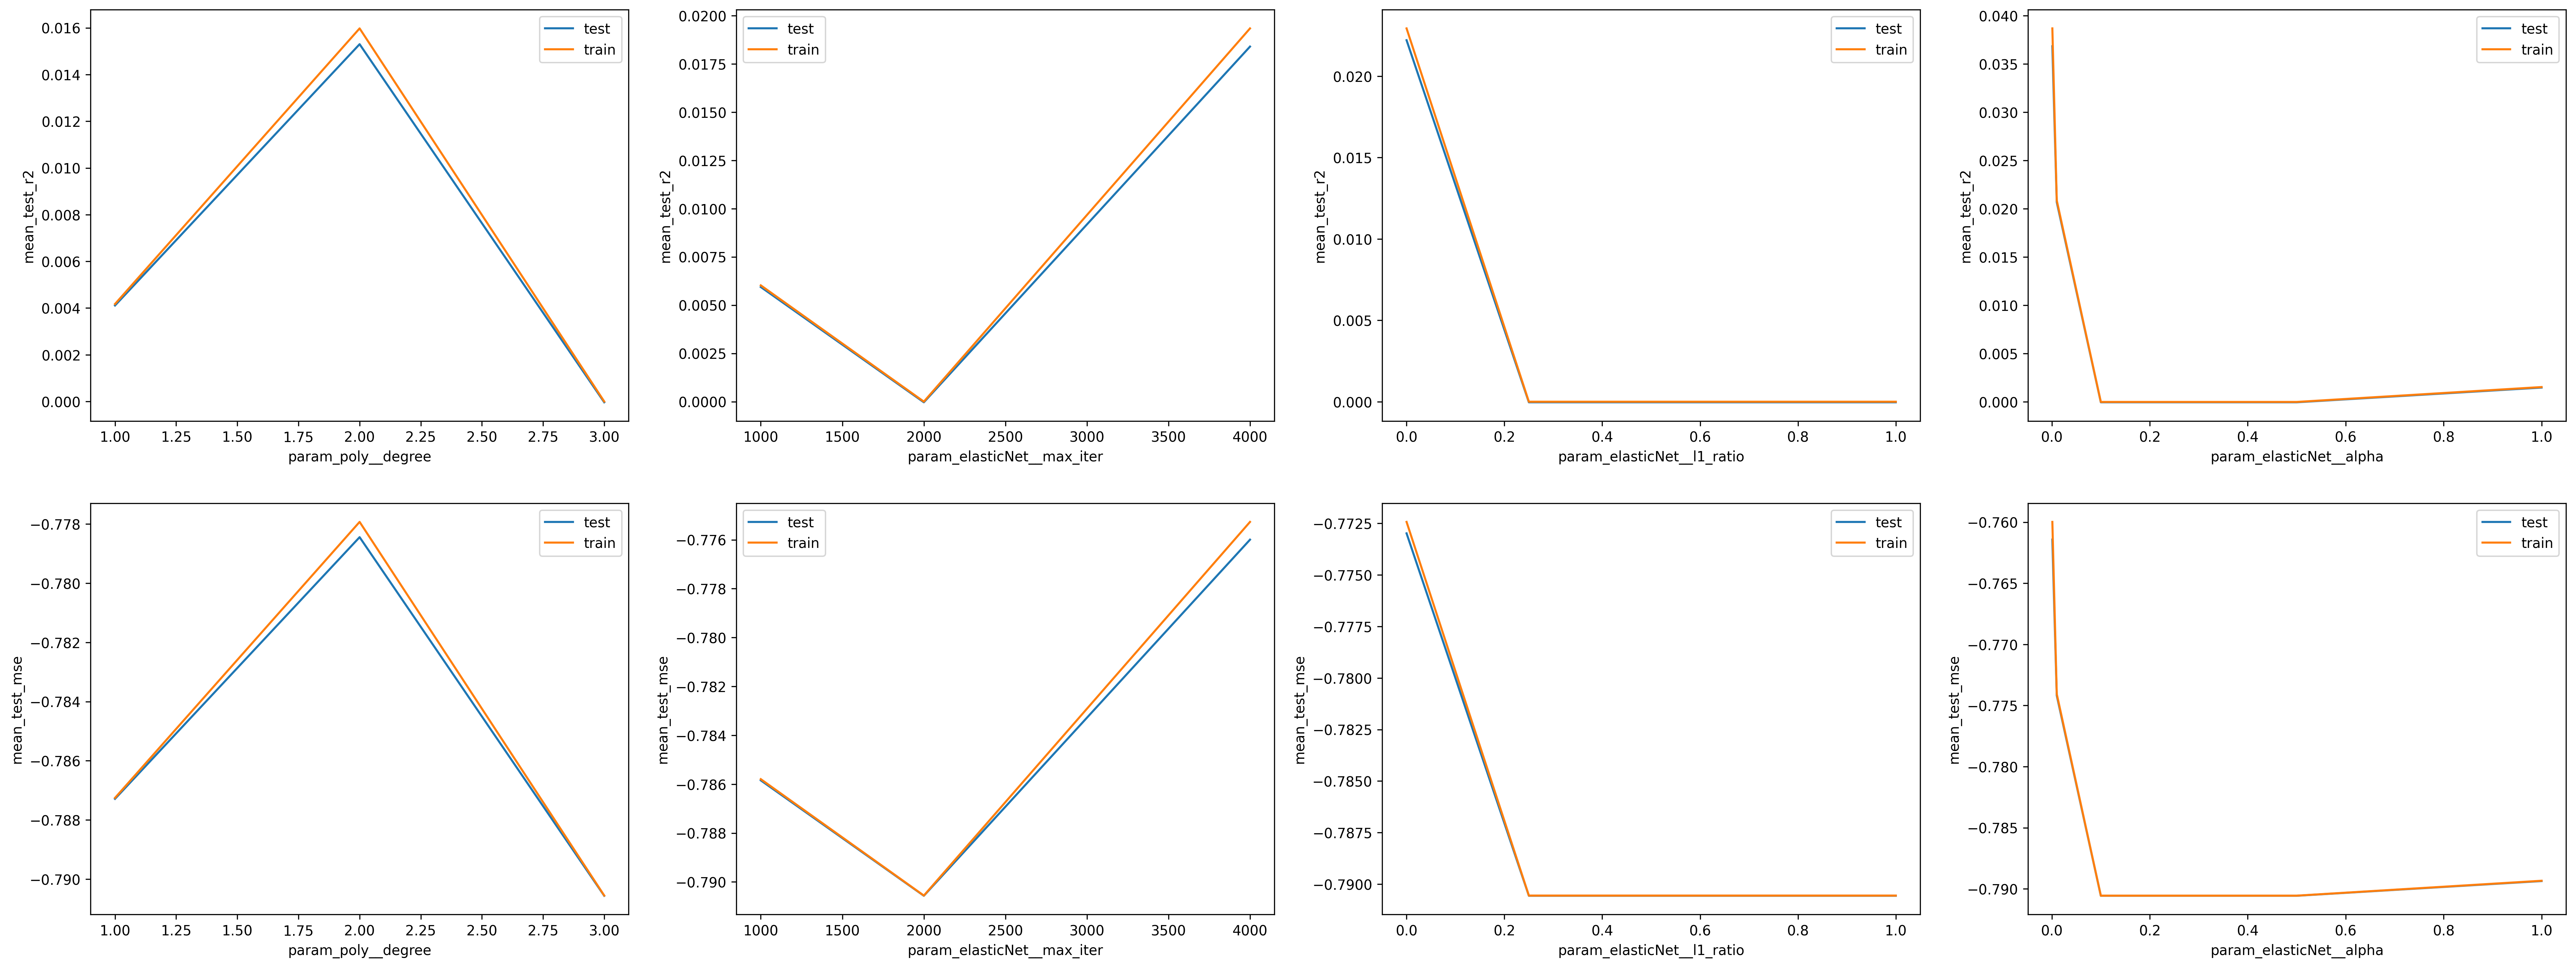

In [25]:
figure, axes = plt.subplots(nrows=2, ncols=4, figsize=[32, 12], dpi=300)
elastic_net_rgs = pd.DataFrame(rgs.cv_results_)

sns.lineplot(x='param_poly__degree', y='mean_test_r2', data=elastic_net_rgs,
             err_style=None, label='test', ax=axes[0, 0])
sns.lineplot(x='param_poly__degree', y='mean_train_r2', data=elastic_net_rgs,
             err_style=None, label='train', ax=axes[0, 0])
sns.lineplot(x='param_elasticNet__max_iter', y='mean_test_r2', data=elastic_net_rgs,
             err_style=None, label='test', ax=axes[0, 1])
sns.lineplot(x='param_elasticNet__max_iter', y='mean_train_r2', data=elastic_net_rgs,
             err_style=None, label='train', ax=axes[0, 1])
sns.lineplot(x='param_elasticNet__l1_ratio', y='mean_test_r2', data=elastic_net_rgs,
             err_style=None, label='test', ax=axes[0, 2])
sns.lineplot(x='param_elasticNet__l1_ratio', y='mean_train_r2', data=elastic_net_rgs,
             err_style=None, label='train', ax=axes[0, 2])
sns.lineplot(x='param_elasticNet__alpha', y='mean_test_r2', data=elastic_net_rgs,
             err_style=None, label='test', ax=axes[0, 3])
sns.lineplot(x='param_elasticNet__alpha', y='mean_train_r2', data=elastic_net_rgs,
             err_style=None, label='train', ax=axes[0, 3])

sns.lineplot(x='param_poly__degree', y='mean_test_mse', data=elastic_net_rgs,
             err_style=None, label='test', ax=axes[1, 0])
sns.lineplot(x='param_poly__degree', y='mean_train_mse', data=elastic_net_rgs,
             err_style=None, label='train', ax=axes[1, 0])
sns.lineplot(x='param_elasticNet__max_iter', y='mean_test_mse', data=elastic_net_rgs,
             err_style=None, label='test', ax=axes[1, 1])
sns.lineplot(x='param_elasticNet__max_iter', y='mean_train_mse', data=elastic_net_rgs,
             err_style=None, label='train', ax=axes[1, 1])
sns.lineplot(x='param_elasticNet__l1_ratio', y='mean_test_mse', data=elastic_net_rgs,
             err_style=None, label='test', ax=axes[1, 2])
sns.lineplot(x='param_elasticNet__l1_ratio', y='mean_train_mse', data=elastic_net_rgs,
             err_style=None, label='train', ax=axes[1, 2])
sns.lineplot(x='param_elasticNet__alpha', y='mean_test_mse', data=elastic_net_rgs,
             err_style=None, label='test', ax=axes[1, 3])
sns.lineplot(x='param_elasticNet__alpha', y='mean_train_mse', data=elastic_net_rgs,
             err_style=None, label='train', ax=axes[1, 3])

plt.show()

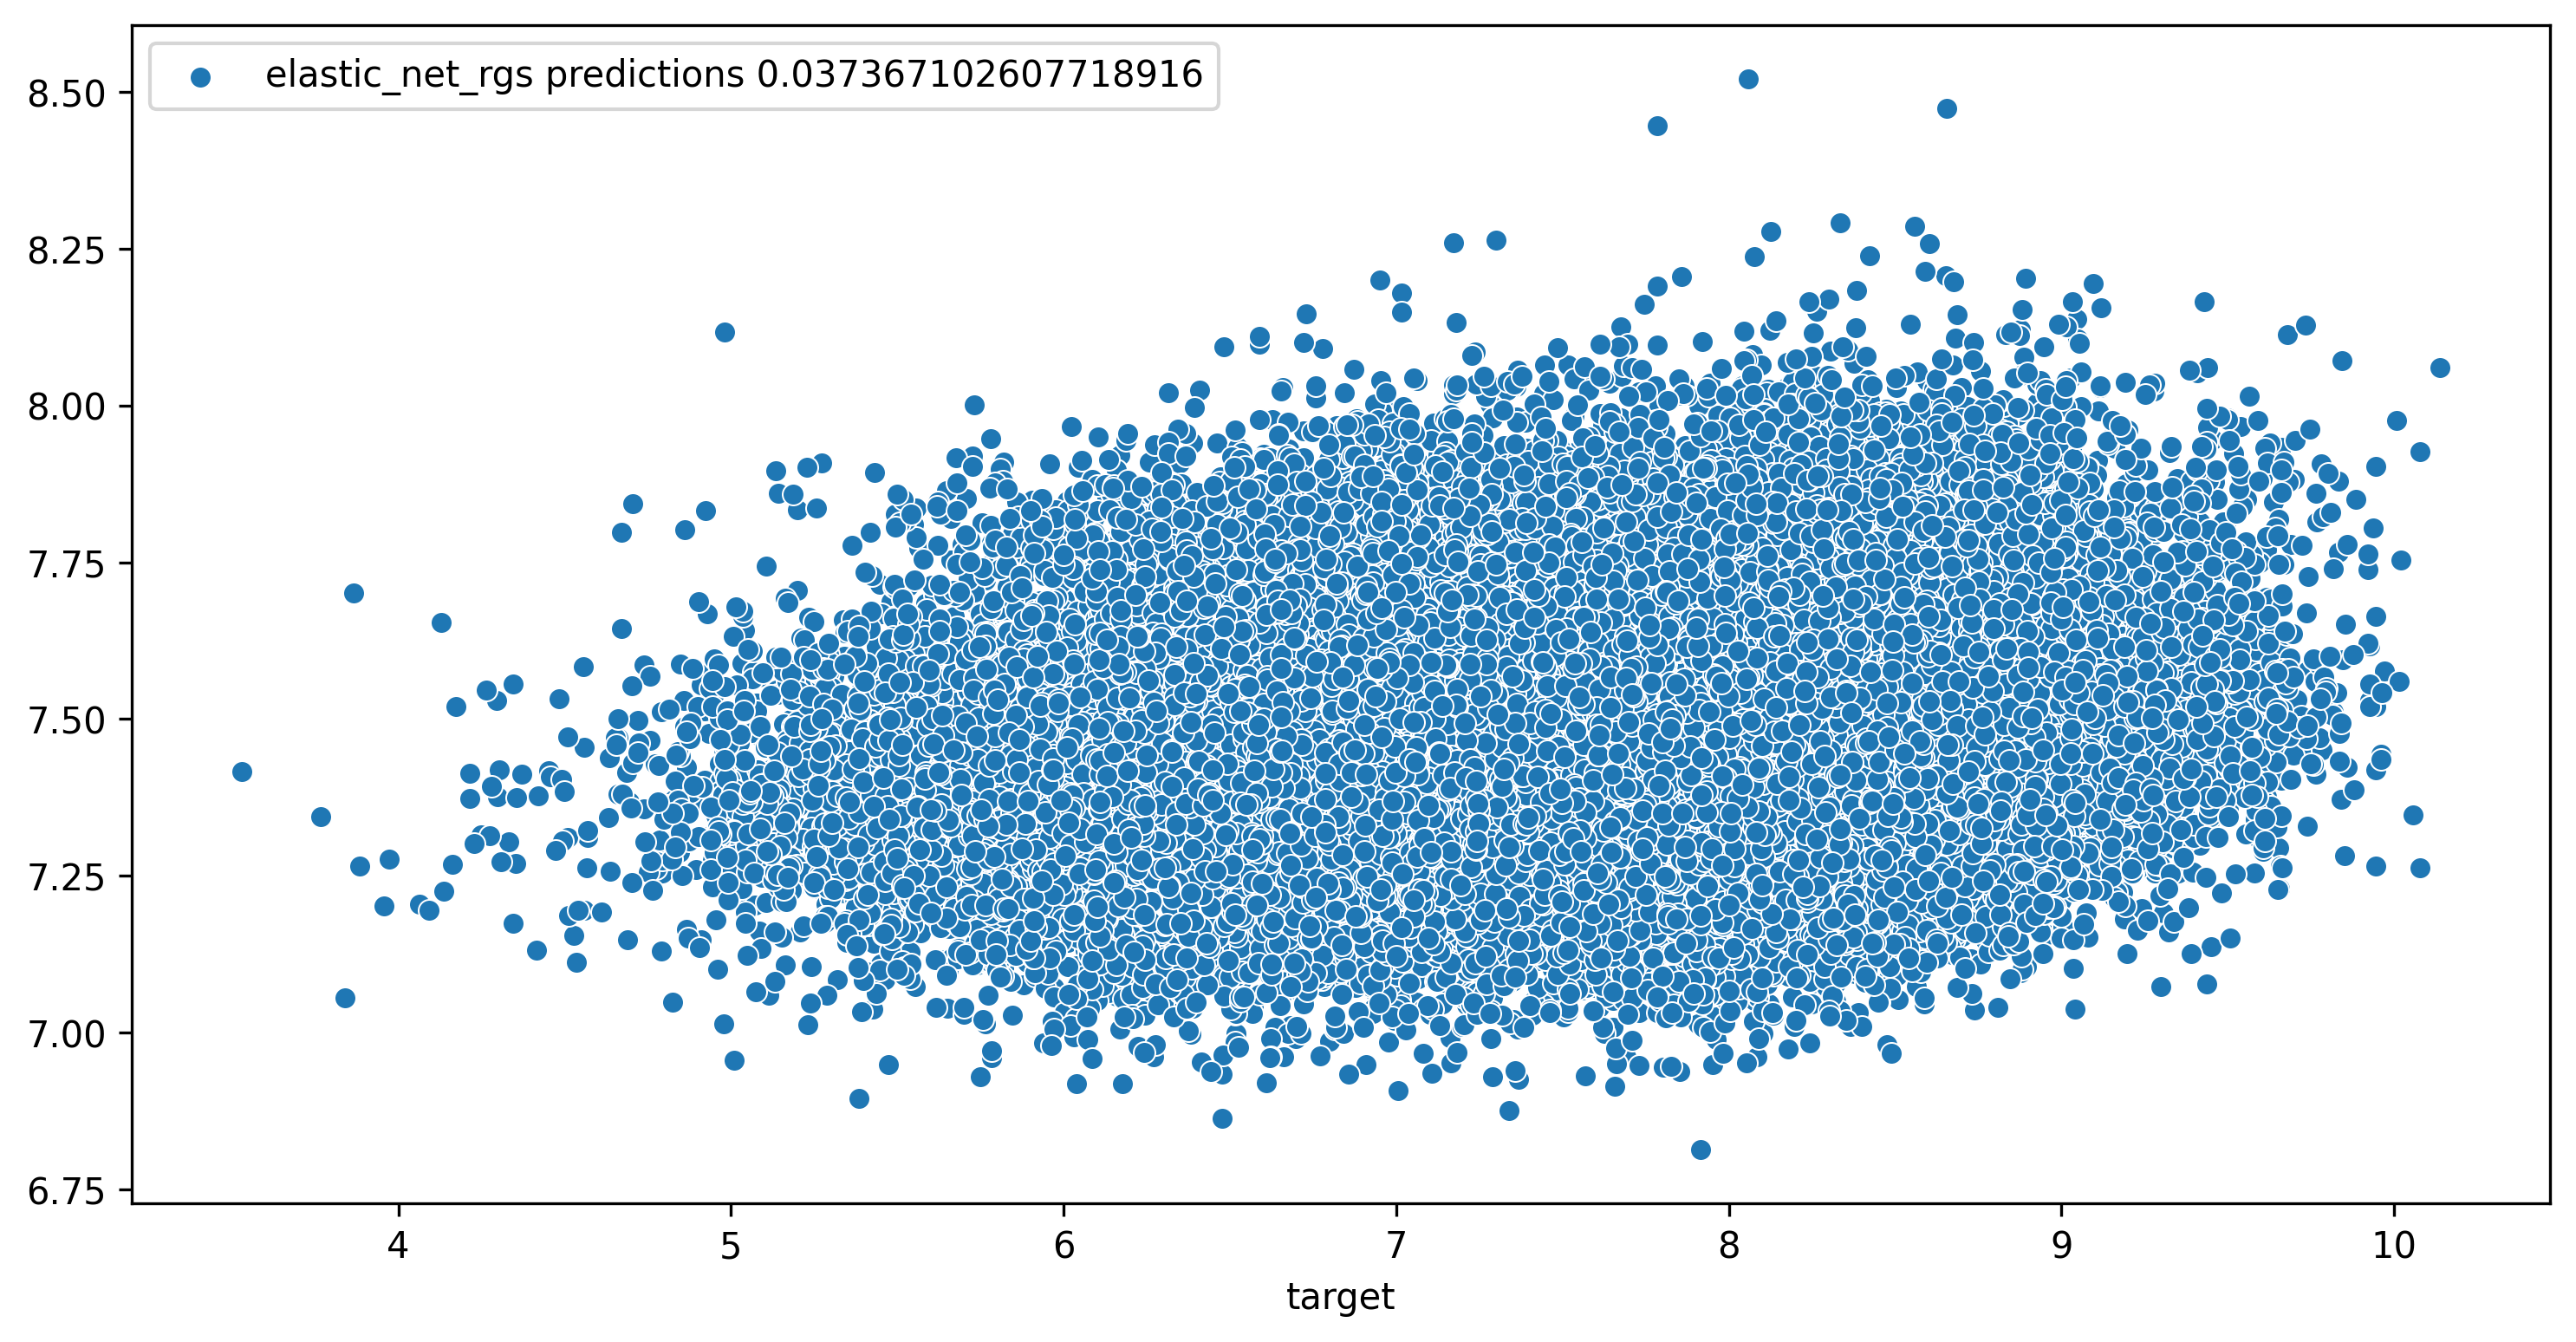

In [28]:
plt.figure(figsize=[12, 6], dpi=300)
sns.scatterplot(x=test_y, y=rgs.predict(test_x), label=f'elastic_net_rgs predictions {rgs.score(test_x, test_y)}')
plt.legend()
plt.show()

In [56]:
mean_squared_error(test_y, rgs.predict(test_x), squared=False)

0.86955419293765

In [51]:
test = pd.read_csv('../data/test.csv', index_col='id')
cont_columns = test.select_dtypes(include=np.number).columns.to_list()
test[cont_columns] = range_scale.fit_transform(test[cont_columns])
test_ = base_line.transform(test)
test_

array([[ 0.45774   ,  0.92183667,  0.31538667, ...,  0.16501702,
        -1.60355954, -0.39599213],
       [ 0.45774   ,  0.92183667,  0.40351333, ...,  0.3886784 ,
        -0.38203791, -1.13475673],
       [ 0.45774   ,  0.92183667,  0.40351333, ...,  0.41136403,
        -0.33875032, -1.0867355 ],
       ...,
       [ 0.54226   ,  0.92183667,  0.40351333, ...,  0.40453565,
        -0.52256518, -0.25666521],
       [ 0.45774   ,  0.92183667,  0.40351333, ...,  0.57472362,
        -0.32918118, -0.03012371],
       [ 0.45774   ,  0.92183667,  0.14065   , ...,  0.58365031,
        -0.45655975, -0.29546358]])

In [57]:
prediction = pd.DataFrame(data=rgs.predict(test_), index=test.index, columns=['target'])
prediction

,target
id,
0,7.431546
5,7.746504
15,7.617044
16,7.572680
17,7.606554
...,...
499987,7.214940
499990,7.363361
499991,7.429093


In [59]:
prediction.to_csv('../data/prediction/predictions_v_1_0.csv')

***HUBER***

In [9]:
huber = Pipeline(steps=[('poly', PolynomialFeatures()),
                        ('huber', HuberRegressor())
                        ]
                 )
huber.get_params()

{'memory': None,
 'steps': [('poly', PolynomialFeatures()), ('huber', HuberRegressor())],
 'verbose': False,
 'poly': PolynomialFeatures(),
 'huber': HuberRegressor(),
 'poly__degree': 2,
 'poly__include_bias': True,
 'poly__interaction_only': False,
 'poly__order': 'C',
 'huber__alpha': 0.0001,
 'huber__epsilon': 1.35,
 'huber__fit_intercept': True,
 'huber__max_iter': 100,
 'huber__tol': 1e-05,
 'huber__warm_start': False}

In [10]:
max_iter = 10

huber_rgs = RandomizedSearchCV(estimator=huber,
                               param_distributions={'poly__degree': [1, 2, 3],
                                                    'huber__alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                                                                     100],
                                                    'huber__epsilon': [1, 1.2, 1.35, 1.5, 2, 2.5, 5],
                                                    'huber__max_iter': [100, 200, 300]
                                                    },
                               n_iter=max_iter,
                               cv=cv,
                               return_train_score=True,
                               scoring={'r2': make_scorer(r2_score),
                                        'mse': make_scorer(mean_squared_error, greater_is_better=False)
                                        },
                               refit='r2',
                               n_jobs=-1)
huber_rgs.get_params()

{'cv': RepeatedKFold(n_repeats=12, n_splits=6, random_state=None),
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('poly', PolynomialFeatures()),
  ('huber', HuberRegressor())],
 'estimator__verbose': False,
 'estimator__poly': PolynomialFeatures(),
 'estimator__huber': HuberRegressor(),
 'estimator__poly__degree': 2,
 'estimator__poly__include_bias': True,
 'estimator__poly__interaction_only': False,
 'estimator__poly__order': 'C',
 'estimator__huber__alpha': 0.0001,
 'estimator__huber__epsilon': 1.35,
 'estimator__huber__fit_intercept': True,
 'estimator__huber__max_iter': 100,
 'estimator__huber__tol': 1e-05,
 'estimator__huber__warm_start': False,
 'estimator': Pipeline(steps=[('poly', PolynomialFeatures()), ('huber', HuberRegressor())]),
 'n_iter': 10,
 'n_jobs': -1,
 'param_distributions': {'poly__degree': [1, 2, 3],
  'huber__alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
  'huber__epsilon': [1, 1.2, 1.35, 1.5, 2, 2.5, 5],
  'huber__max_ite

In [11]:
huber_rgs.fit(train_x, train_y)

C:\Users\hewar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RandomizedSearchCV(cv=RepeatedKFold(n_repeats=12, n_splits=6, random_state=None),
                   estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                             ('huber', HuberRegressor())]),
                   n_jobs=-1,
                   param_distributions={'huber__alpha': [1e-06, 1e-05, 0.0001,
                                                         0.001, 0.01, 0.1, 1,
                                                         10, 100],
                                        'huber__epsilon': [1, 1.2, 1.35, 1.5, 2,
                                                           2.5, 5],
                                        'huber__max_iter': [100, 200, 300],
                                        'poly__degree': [1, 2, 3]},
                   refit='r2', return_train_score=True,
                   scoring={'mse': make_scorer(mean_squared_error, greater_is_better=False),
                            'r2': make_scorer(r2_score)})

In [12]:
huber_rgs.best_estimator_, huber_rgs.best_score_, huber_rgs.best_params_

(Pipeline(steps=[('poly', PolynomialFeatures()),
                 ('huber', HuberRegressor(epsilon=1.5, max_iter=300))]),
 0.03772706298449544,
 {'poly__degree': 2,
  'huber__max_iter': 300,
  'huber__epsilon': 1.5,
  'huber__alpha': 0.0001})

In [13]:
huber_rgs.cv_results_

{'mean_fit_time': array([213.51839582,   8.6162815 ,  69.47080662, 111.75859402,
        456.01524288, 217.99502662,   7.7387126 ,   7.08686739,
         37.26626814,  70.70053144]),
 'std_fit_time': array([4.13048071, 0.72582634, 1.80209354, 5.73940427, 6.32826538,
        4.01069258, 0.68992414, 0.26047099, 0.92182416, 1.48338968]),
 'mean_score_time': array([0.38404266, 0.01816504, 0.11555619, 0.12902008, 0.40227076,
        0.40557705, 0.01899561, 0.02037269, 0.11643227, 0.11356201]),
 'std_score_time': array([0.02937412, 0.00197591, 0.01387003, 0.03047483, 0.03006831,
        0.02970947, 0.00395337, 0.0025632 , 0.00904788, 0.01631635]),
 'param_poly__degree': masked_array(data=[3, 1, 2, 2, 3, 3, 1, 1, 2, 2],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_huber__max_iter': masked_array(data=[200, 200, 200, 300, 300, 200, 100, 100, 100, 300],
              mask

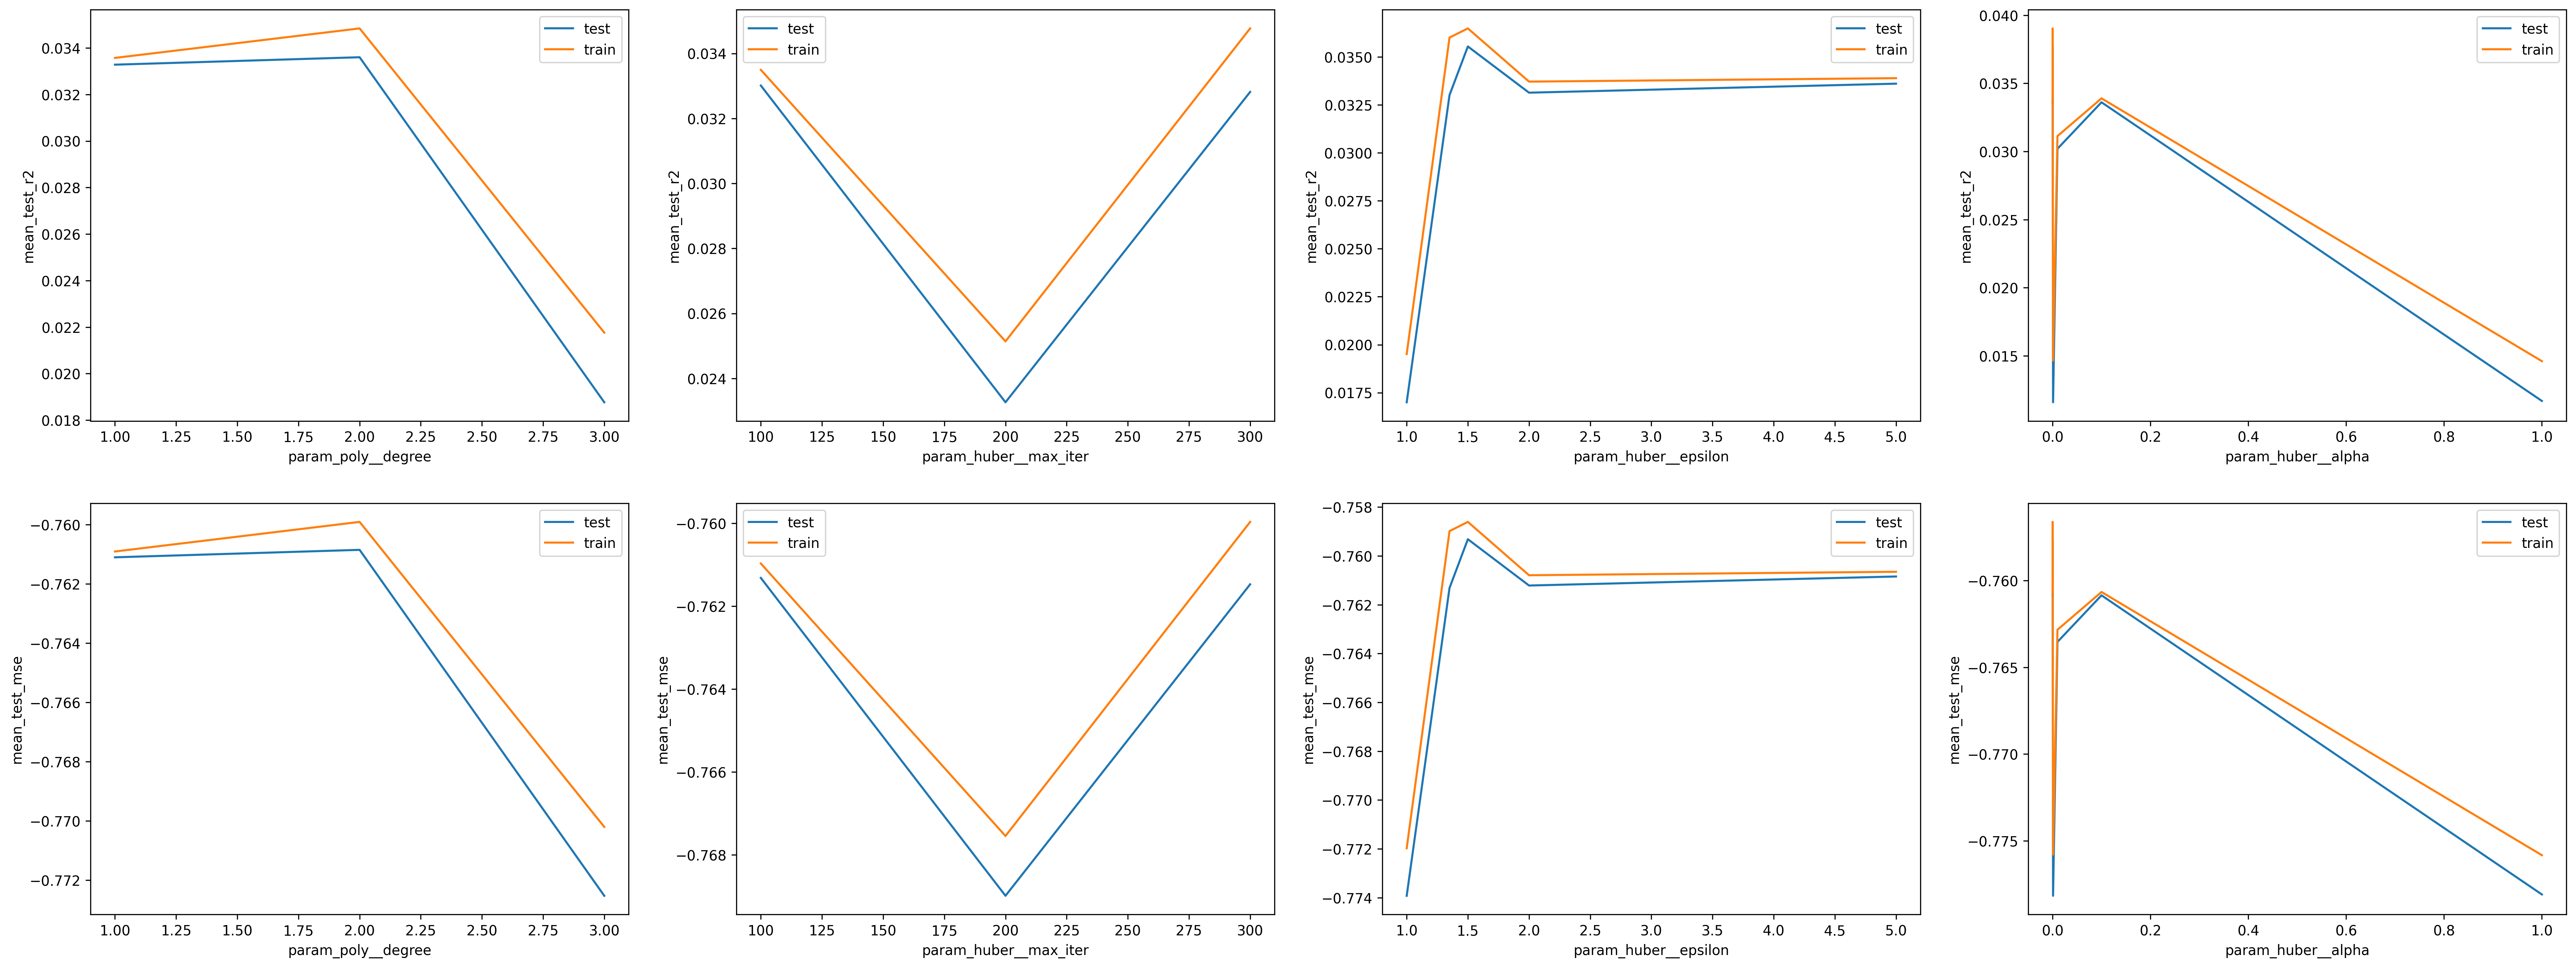

In [14]:
figure_hbr, axes = plt.subplots(nrows=2, ncols=4, figsize=[32, 12], dpi=300)
hbr_rgs = pd.DataFrame(huber_rgs.cv_results_)

sns.lineplot(x='param_poly__degree', y='mean_test_r2', data=hbr_rgs,
             err_style=None, label='test', ax=axes[0, 0])
sns.lineplot(x='param_poly__degree', y='mean_train_r2', data=hbr_rgs,
             err_style=None, label='train', ax=axes[0, 0])
sns.lineplot(x='param_huber__max_iter', y='mean_test_r2', data=hbr_rgs,
             err_style=None, label='test', ax=axes[0, 1])
sns.lineplot(x='param_huber__max_iter', y='mean_train_r2', data=hbr_rgs,
             err_style=None, label='train', ax=axes[0, 1])
sns.lineplot(x='param_huber__epsilon', y='mean_test_r2', data=hbr_rgs,
             err_style=None, label='test', ax=axes[0, 2])
sns.lineplot(x='param_huber__epsilon', y='mean_train_r2', data=hbr_rgs,
             err_style=None, label='train', ax=axes[0, 2])
sns.lineplot(x='param_huber__alpha', y='mean_test_r2', data=hbr_rgs,
             err_style=None, label='test', ax=axes[0, 3])
sns.lineplot(x='param_huber__alpha', y='mean_train_r2', data=hbr_rgs,
             err_style=None, label='train', ax=axes[0, 3])

sns.lineplot(x='param_poly__degree', y='mean_test_mse', data=hbr_rgs,
             err_style=None, label='test', ax=axes[1, 0])
sns.lineplot(x='param_poly__degree', y='mean_train_mse', data=hbr_rgs,
             err_style=None, label='train', ax=axes[1, 0])
sns.lineplot(x='param_huber__max_iter', y='mean_test_mse', data=hbr_rgs,
             err_style=None, label='test', ax=axes[1, 1])
sns.lineplot(x='param_huber__max_iter', y='mean_train_mse', data=hbr_rgs,
             err_style=None, label='train', ax=axes[1, 1])
sns.lineplot(x='param_huber__epsilon', y='mean_test_mse', data=hbr_rgs,
             err_style=None, label='test', ax=axes[1, 2])
sns.lineplot(x='param_huber__epsilon', y='mean_train_mse', data=hbr_rgs,
             err_style=None, label='train', ax=axes[1, 2])
sns.lineplot(x='param_huber__alpha', y='mean_test_mse', data=hbr_rgs,
             err_style=None, label='test', ax=axes[1, 3])
sns.lineplot(x='param_huber__alpha', y='mean_train_mse', data=hbr_rgs,
             err_style=None, label='train', ax=axes[1, 3])

plt.show()

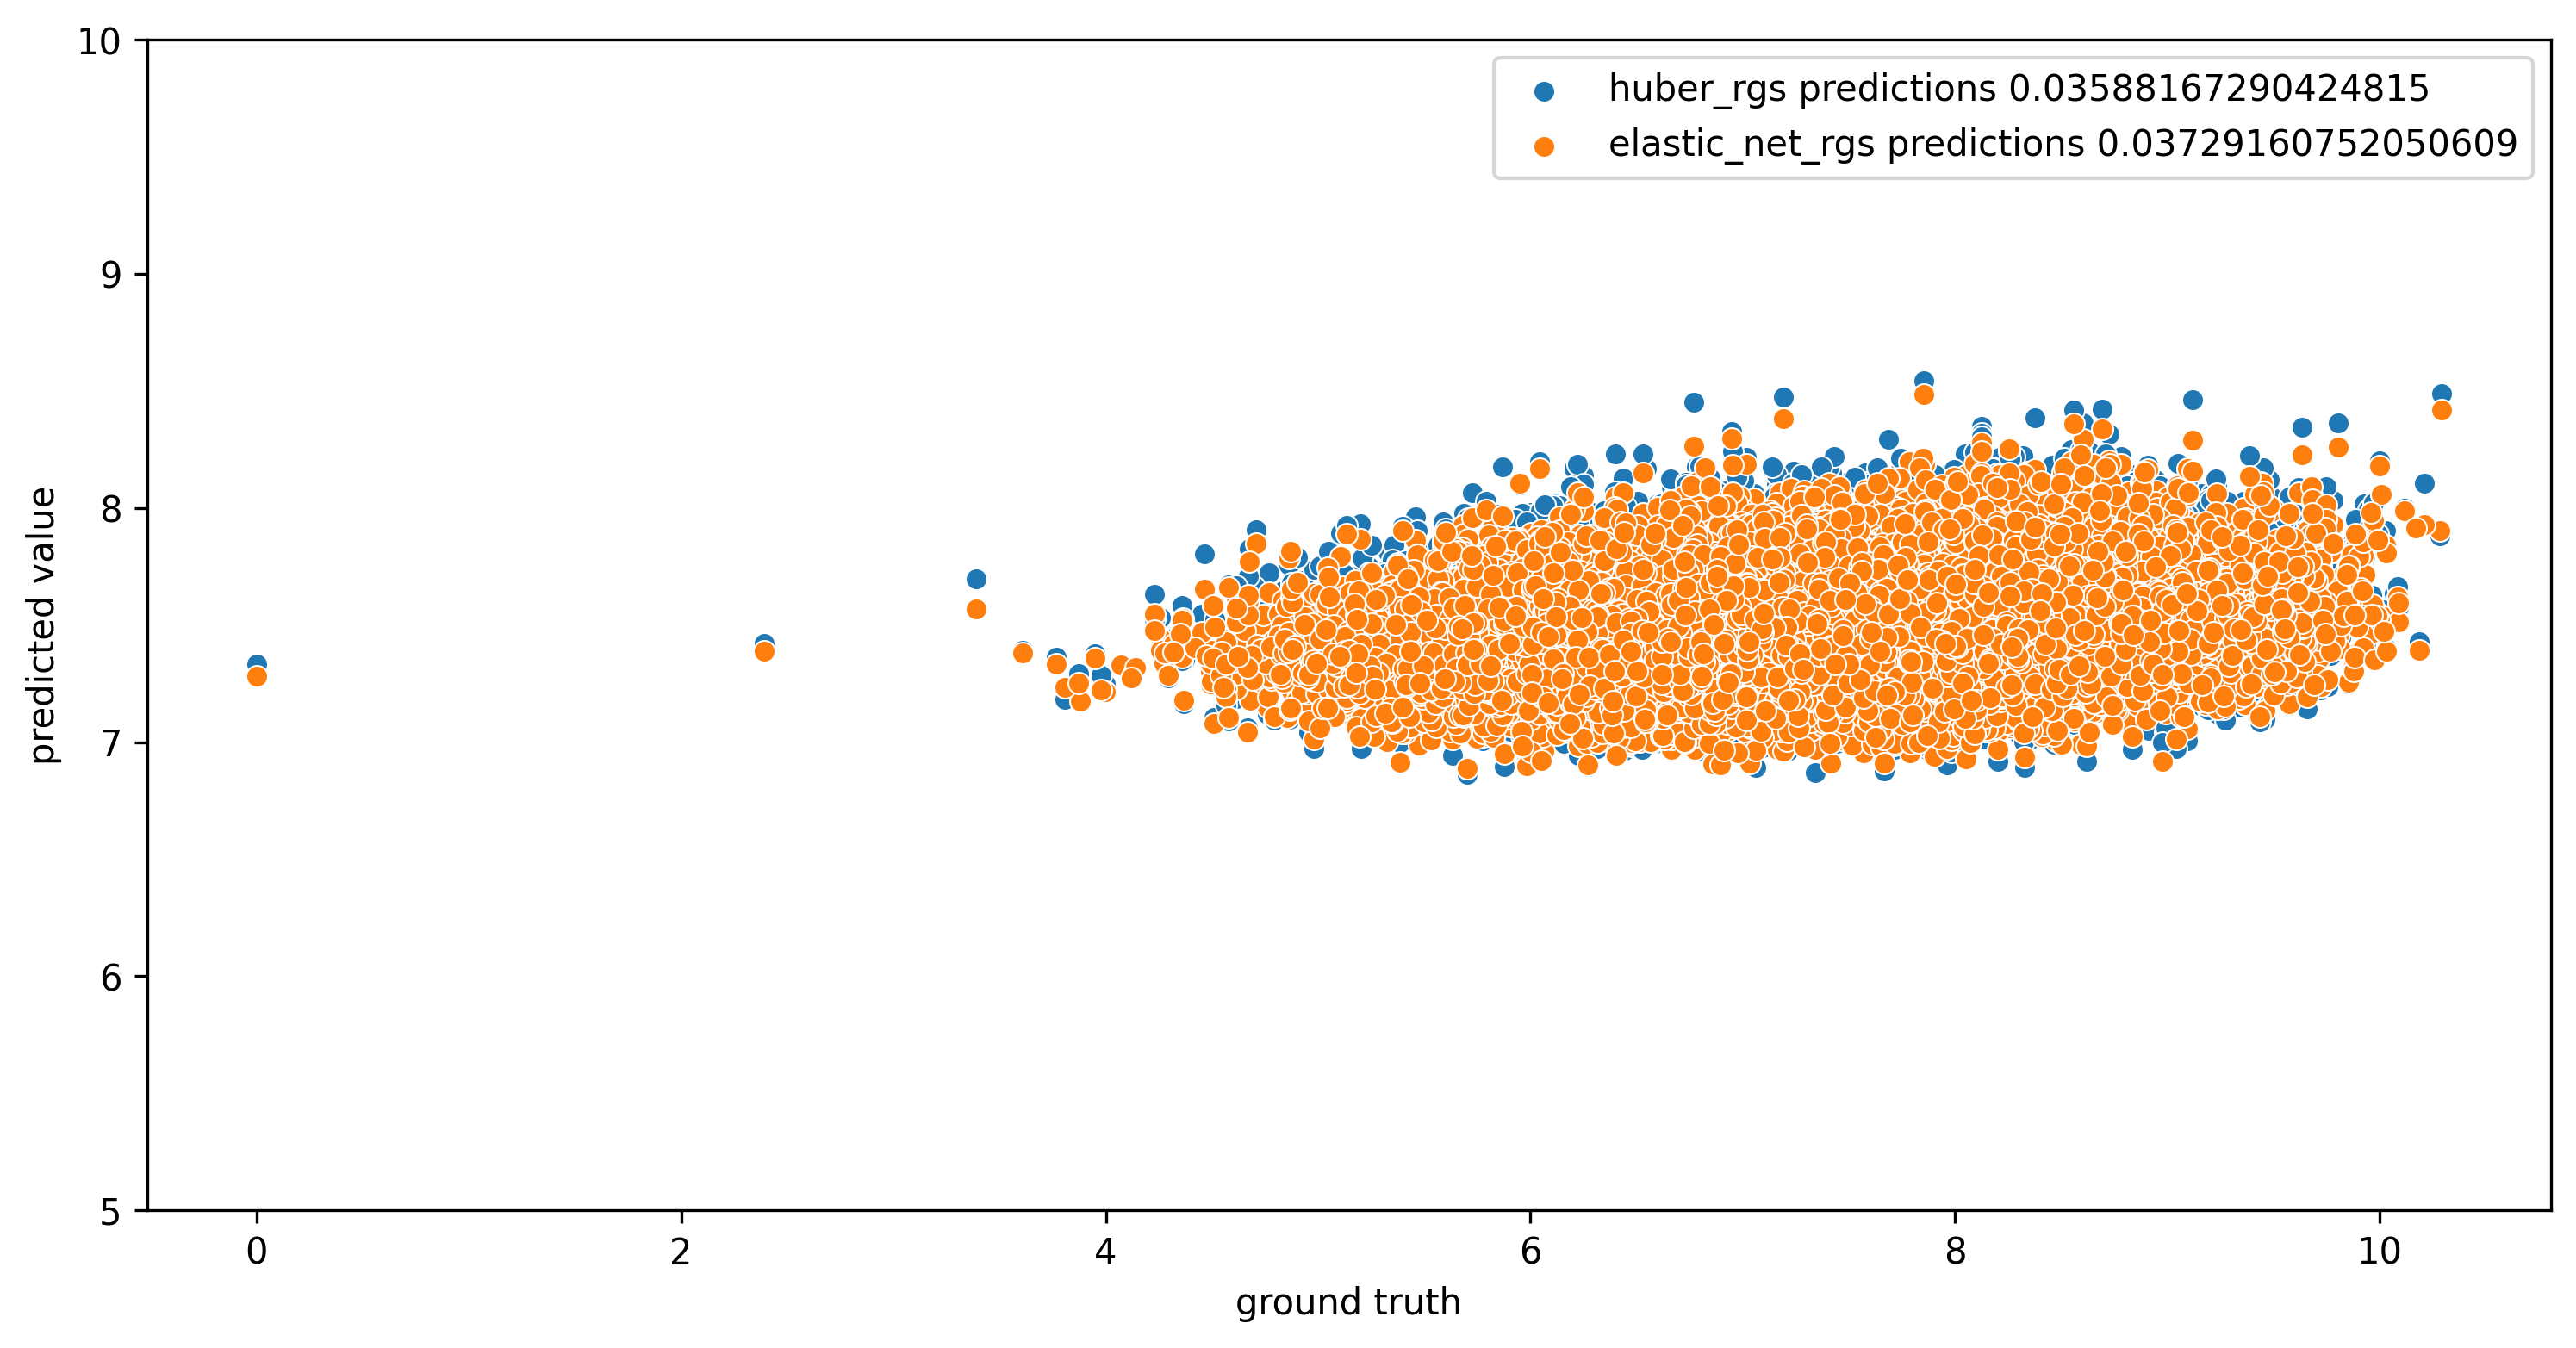

In [25]:
plt.figure(figsize=[12, 6], dpi=300)
sns.scatterplot(x=test_y, y=huber_rgs.predict(test_x),
                label=f'huber_rgs predictions {huber_rgs.score(test_x, test_y)}')
sns.scatterplot(x=test_y, y=en_rgs.predict(test_x),
                label=f'elastic_net_rgs predictions {en_rgs.score(test_x, test_y)}')
plt.ylim(5, 10)
plt.xlabel('ground truth')
plt.ylabel('predicted value')
plt.legend()
plt.show()

In [17]:
mean_squared_error(test_y, huber_rgs.predict(test_x), squared=False)

0.8727924792282694

***K-NEAREST NEIGHBORS***

In [27]:
knn = Pipeline(steps=[('poly', PolynomialFeatures()),
                      ('knn', KNeighborsRegressor(n_jobs=-1))
                      ]
               )
knn.get_params()

{'memory': None,
 'steps': [('poly', PolynomialFeatures()),
  ('knn', KNeighborsRegressor(n_jobs=-1))],
 'verbose': False,
 'poly': PolynomialFeatures(),
 'knn': KNeighborsRegressor(n_jobs=-1),
 'poly__degree': 2,
 'poly__include_bias': True,
 'poly__interaction_only': False,
 'poly__order': 'C',
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': -1,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [28]:
max_iter = 10

knn_rgs = RandomizedSearchCV(estimator=knn,
                             param_distributions={'poly__degree': [1, 2, 3],
                                                  'knn__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                                                  'knn__leaf_size': [30, 90, 150, 210, 270],
                                                  'knn__n_neighbors': [3, 15, 27, 39, 51, 63, 75],
                                                  'knn__weights': ['uniform', 'distance']
                                                  },
                             n_iter=max_iter,
                             cv=cv,
                             return_train_score=True,
                             scoring={'r2': make_scorer(r2_score),
                                      'mse': make_scorer(mean_squared_error, greater_is_better=False)
                                      },
                             refit='r2',
                             n_jobs=-1)
knn_rgs.get_params()

{'cv': RepeatedKFold(n_repeats=12, n_splits=6, random_state=None),
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('poly', PolynomialFeatures()),
  ('knn', KNeighborsRegressor(n_jobs=-1))],
 'estimator__verbose': False,
 'estimator__poly': PolynomialFeatures(),
 'estimator__knn': KNeighborsRegressor(n_jobs=-1),
 'estimator__poly__degree': 2,
 'estimator__poly__include_bias': True,
 'estimator__poly__interaction_only': False,
 'estimator__poly__order': 'C',
 'estimator__knn__algorithm': 'auto',
 'estimator__knn__leaf_size': 30,
 'estimator__knn__metric': 'minkowski',
 'estimator__knn__metric_params': None,
 'estimator__knn__n_jobs': -1,
 'estimator__knn__n_neighbors': 5,
 'estimator__knn__p': 2,
 'estimator__knn__weights': 'uniform',
 'estimator': Pipeline(steps=[('poly', PolynomialFeatures()),
                 ('knn', KNeighborsRegressor(n_jobs=-1))]),
 'n_iter': 10,
 'n_jobs': -1,
 'param_distributions': {'poly__degree': [1, 2, 3],
  'knn__algorithm': ['ball_tr

In [29]:
knn_rgs.fit(train_x, train_y)

exception calling callback for <Future at 0x2741e7d52b0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "C:\Users\hewar\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "C:\Users\hewar\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\parallel.py", line 359, in __call__
    self.parallel.dispatch_next()
  File "C:\Users\hewar\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\parallel.py", line 792, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "C:\Users\hewar\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\hewar\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [ ]:
knn_rgs.best_estimator_, knn_rgs.best_score_, knn_rgs.best_params_

In [ ]:
knn_rgs.cv_results_